In [4]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import io, img_as_float
from skimage.filters import gaussian
import numpy as np
from skimage.filters import threshold_otsu
import cv2


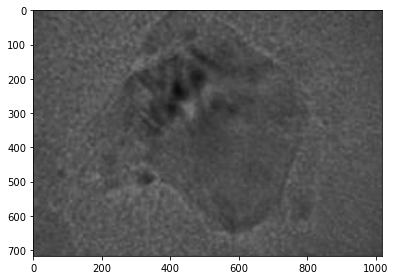

In [6]:
img = io.imread("diamond.jpg", as_gray=True)

gaussian_using_skimage = gaussian(img, sigma=1, mode='constant', cval=0.0)
io.imshow(gaussian_using_skimage)

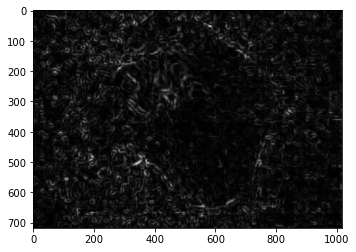

In [7]:
from scipy import ndimage 
k=7
img_mean = ndimage.uniform_filter(img, (k, k))
img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
img_var = img_sqr_mean - img_mean**2
plt.imshow(img_var, cmap='gray')

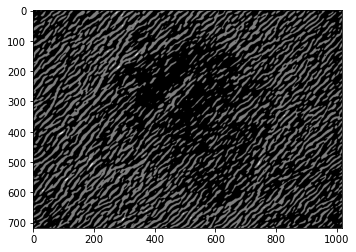

In [8]:
ksize=45
theta=np.pi/4
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap='gray')

/var/folders/4p/dc93147d239bsfnnrb71jpdr0000gn/T/ipykernel_91211/1944440783.py:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  entropy_img = entropy(img_var, disk(10))


(array([7.26666e+05, 6.78000e+02, 7.46000e+02, 2.53000e+02, 2.81000e+02,
        9.90000e+01, 2.49000e+02, 7.30000e+01, 6.30000e+01, 8.10000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

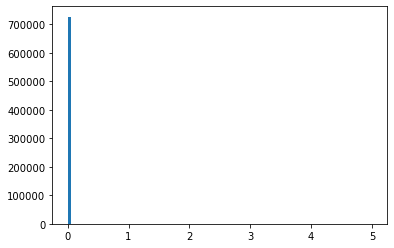

In [20]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
entropy_img = entropy(img_var, disk(10))
#plt.imshow(entropy_img)

#Scratch Analysis - single image
#Now let us use otsu to threshold high vs low entropy regions.
plt.hist(entropy_img.flat, bins=100, range=(0,5))  #.flat returns the flattened numpy array (1D)



Scratched area is:  728026 Square pixels
Scratched area in sq. microns is:  1820.0650000000003 Square pixels


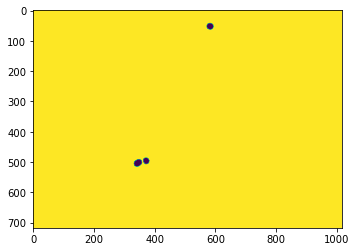

In [21]:
thresh = threshold_otsu(entropy_img)

#Now let us binarize the entropy image 
binary = entropy_img <= thresh
plt.imshow(binary)

#Sum all pixels in the scratch region (values =1)
scratch_area = np.sum(binary == 1) 
print("Scratched area is: ", scratch_area, "Square pixels")

scale = .05 # microns/pixel
print("Scratched area in sq. microns is: ", scratch_area*((scale)**2), "Square pixels")